# Simple Group Data Generation Example
For the group data generation, the probability to have a true positive label is dependant on the previous predictions of the whole group. In the simple generator, points can either be sampled from the positive or negative cluster and the number of previous positive predictions defines the probability for a point to be sampled from one of the two clusters

In [1]:
import sys
import numpy as np
sys.path.append("../")

from sklearn.linear_model import LogisticRegression
from aif360.algorithms.inprocessing import PrejudiceRemover

from long_term_fairness.ltf import LongTermFairnessPlot
from long_term_fairness.ltf_data.group_data_generator_simple import DataGenerator as GrpDataGen
from long_term_fairness.ltf_aif.longterm_aif import AifLongTermMetric, AifLongTermPrediction

Import error: No module named 'tensorflow'


In [2]:
generator = GrpDataGen(mean_pos=[0, 1],
                       mean_neg=[8, 9],
                       num_positive_label=100,
                       num_negative_label=100,
                       discrimination_factor=.9)

In [3]:
metric = AifLongTermMetric()

In [4]:
clf = AifLongTermPrediction(PrejudiceRemover())

In [5]:
l = LongTermFairnessPlot(generator.generate_data, clf, metric.metric, x_lim=[-3, 12], y_lim=[-1, 13])

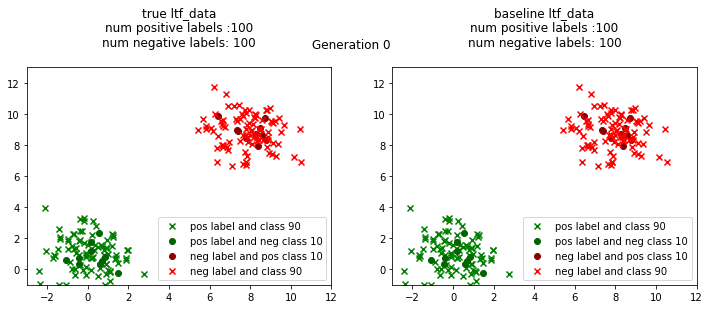

In [6]:
l.init_data()
l.plot_generation()

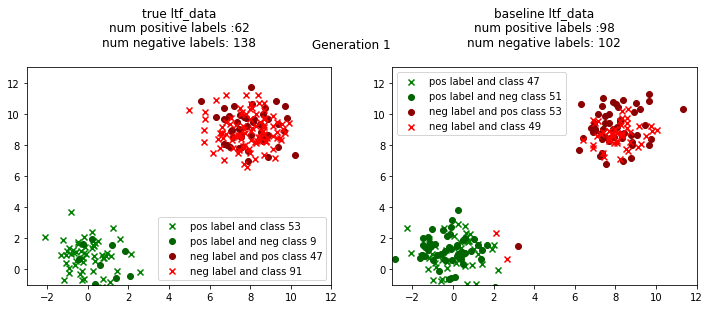

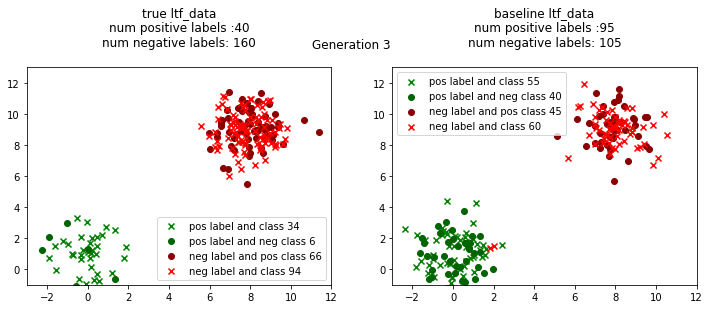

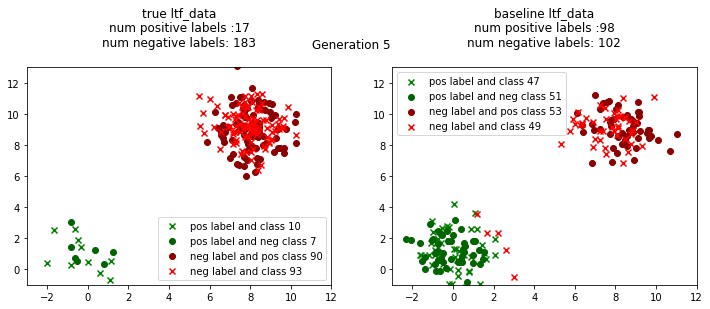

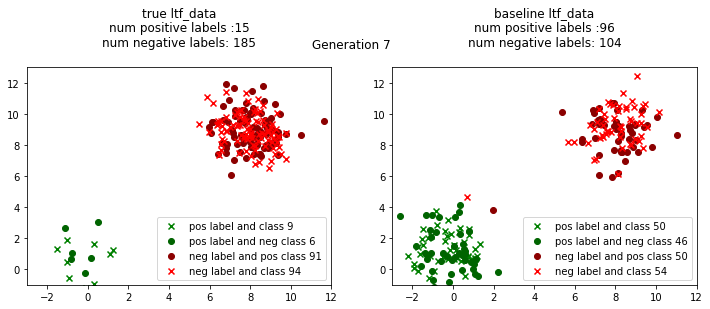

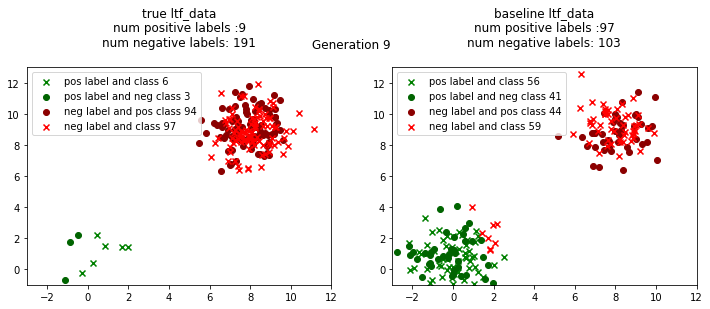

In [7]:
for i in range(10):

    l.run_generation()
    l._run_baseline_generation()
    if i % 2 == 0:
        l.plot_generation()

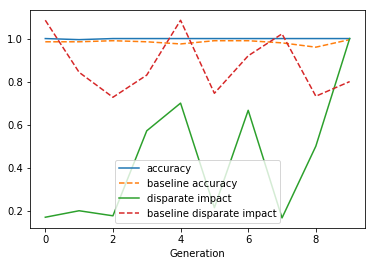

In [8]:
l.plot(["accuracy", "disparate impact"])

D:\Programme\Anaconda\envs\aif360\lib\site-packages\aif360\metrics\classification_metric.py:264: RuntimeWarning: invalid value encountered in double_scalars
  TPR=TP / P, TNR=TN / N, FPR=FP / N, FNR=FN / P,
D:\Programme\Anaconda\envs\aif360\lib\site-packages\aif360\metrics\classification_metric.py:265: RuntimeWarning: invalid value encountered in double_scalars
  GTPR=GTP / P, GTNR=GTN / N, GFPR=GFP / N, GFNR=GFN / P,
D:\Programme\Anaconda\envs\aif360\lib\site-packages\aif360\metrics\dataset_metric.py:82: RuntimeWarning: invalid value encountered in double_scalars
  return metric_fun(privileged=False) / metric_fun(privileged=True)
D:\Programme\Anaconda\envs\aif360\lib\site-packages\aif360\metrics\dataset_metric.py:82: RuntimeWarning: divide by zero encountered in double_scalars
  return metric_fun(privileged=False) / metric_fun(privileged=True)


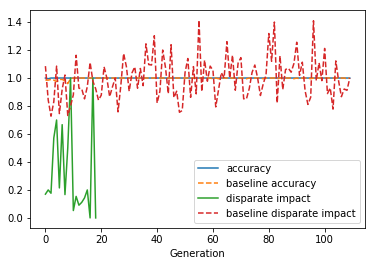

In [9]:
l.run(100)
l.plot(["accuracy", "disparate impact"])